In [1]:
from math import sin,exp,tanh
from random import randint
def fun(x):
    eps=randint(-10,10)/10
    return 3**((exp(x/1000)*tanh(x/10)))+eps
import csv
csv_columns=["No","X","Y"]
dict_data=[]

n=1000
from random import randint


for i in range(n):
    d={}
    x=randint(2,1000)
    # x = x/1000
    y=fun(x)
    d["No"]=i+1
    d["X"]=x
    d["Y"]=y
    dict_data.append(d)
csv_file="t-1.csv"
try:
    with open(csv_file,"w") as csvfile:
        writer=csv.DictWriter(csvfile,fieldnames=csv_columns)
        writer.writeheader()
        for data in dict_data:
            writer.writerow(data)
except IOError:
    print("Error")
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ds=pd.read_csv("t-1.csv")
x=ds.iloc[:,[1]].values
y=ds.iloc[:,2].values

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)
sc_y=StandardScaler()
y=sc_y.fit_transform(y.reshape(-1,1))


for i in range(len(y)):
    epsilon = np.random.randint(-10,100)/90
    y[i] = y[i]-epsilon

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

import keras
from keras.models import Sequential
from keras.layers import Dense
x.shape

rgs=Sequential()
rgs.add(Dense(input_shape=(x.shape[1],),units=7,activation="relu"))
rgs.add(Dense(units=7,activation="relu"))
rgs.add(Dense(units=1))
rgs.compile(optimizer = "adam", loss = "mse", metrics = ['mse'])
rgs.fit(x_train, y_train, batch_size = 10, epochs = 50)

y_pred=rgs.predict(x_test,batch_size=10)

Epoch 1/50
80/80 [==============================] - 0s 852us/step - loss: 1.2073 - mse: 1.2073
Epoch 2/50
80/80 [==============================] - 0s 813us/step - loss: 0.8309 - mse: 0.8309
Epoch 3/50
80/80 [==============================] - 0s 925us/step - loss: 0.6320 - mse: 0.6320
Epoch 4/50
80/80 [==============================] - 0s 846us/step - loss: 0.5408 - mse: 0.5408
Epoch 5/50
80/80 [==============================] - 0s 865us/step - loss: 0.4833 - mse: 0.4833
Epoch 6/50
80/80 [==============================] - 0s 876us/step - loss: 0.4389 - mse: 0.4389
Epoch 7/50
80/80 [==============================] - 0s 841us/step - loss: 0.4048 - mse: 0.4048
Epoch 8/50
80/80 [==============================] - 0s 813us/step - loss: 0.3755 - mse: 0.3755
Epoch 9/50
80/80 [==============================] - 0s 823us/step - loss: 0.3527 - mse: 0.3527
Epoch 10/50
80/80 [==============================] - 0s 820us/step - loss: 0.3327 - mse: 0.3327
Epoch 11/50
80/80 [==============================

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
mean_squared_error(y_test,y_pred)

0.16871243986349455

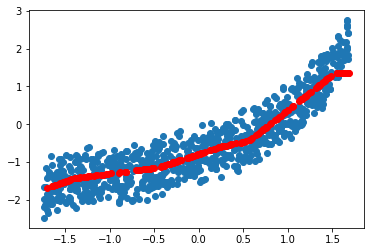

In [4]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_pred,color="red")